In [1]:
import numpy as np
import os
from transform_factory import tensorize, center_crop_224, resize_322, imagenet_normalize
from PIL import Image
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.transforms import InterpolationMode

In [2]:
# config
seed = 0
data_num = 1
expl_method = "LayerXAct"

In [3]:
with open(f"./val_seed_{seed}.npy", "rb") as f:
    filepath_list = np.load(f)

orig_imgs = []
orig_expls = []


for img_path in filepath_list[data_num -1:data_num]:
    img_name = os.path.basename(img_path)

    orig_img = Image.open(img_path)
    orig_img = imagenet_normalize(tensorize(center_crop_224(resize_322(orig_img))))

    orig_imgs.append(orig_img)

    with open(f"results/val_seed_{seed}_pred_orig_eval_orig_transform_both_sign_all_reduction_sum/{img_name}_expl_{expl_method}_sample_2000_sigma_0.05_seed_{seed}_orig_true_config.npy", "rb") as f:
        orig_expl = np.load(f, allow_pickle=True)
        true_expls = np.load(f, allow_pickle=True)
        true_configs = np.load(f, allow_pickle=True)


    with open(f"results/val_seed_{seed}_test_pred_orig_eval_orig_transform_both_sign_all_reduction_sum/{img_name}_expl_{expl_method}_sample_2000_sigma_0.05_seed_{seed}_orig_true_config.npy", "rb") as f:
        _ = np.load(f, allow_pickle=True)
        test_expls = np.load(f, allow_pickle=True)
        test_configs = np.load(f, allow_pickle=True)





FileNotFoundError: [Errno 2] No such file or directory: 'results/val_seed_0_test_pred_orig_eval_orig_transform_both_sign_all_reduction_sum/ILSVRC2012_val_00024718.JPEG_expl_LayerXAct_sample_2000_sigma_0.05_seed_0_orig_true_config.npy'

In [5]:
print(true_configs[0], test_configs[0])

config = true_configs[0]

T_inv_spatial = transforms.Compose([
    transforms.RandomRotation((-config['rot_angle'], -config['rot_angle'])),
    transforms.RandomVerticalFlip(config['flip_vertical']),
    transforms.RandomHorizontalFlip(config['flip_horizon']),
    
])

NameError: name 'test_configs' is not defined

In [7]:
true = center_crop_224(T_inv_spatial(F.interpolate(torch.tensor(true_expls[0]).unsqueeze(0), (322, 322), mode="bicubic")))
# test = center_crop_224(T_inv_spatial(F.interpolate(torch.tensor(test_expls[0]).unsqueeze(0), (322, 322), mode="bicubic")))
test = center_crop_224(F.interpolate(T_inv_spatial(torch.tensor(true_expls[0])).unsqueeze(0), (322, 322), mode='bicubic'))
# test = center_crop_224(T_inv_spatial(F.interpolate(torch.tensor(test_expls[0]).unsqueeze(0), (322, 322), mode="bicubic")))


# true = center_crop_224(T_inv_spatial(F.resize(torch.tensor(true_expls[0]).unsqueeze(0), (322, 322), interpolation = InterpolationMode.BICUBIC)))
# test = center_crop_224(T_inv_spatial(F.resize(torch.tensor(test_expls[0]).unsqueeze(0), (322, 322), interpolation = InterpolationMode.BICUBIC)))


In [8]:
torch.abs(true - test).mean()

tensor(0.0213)

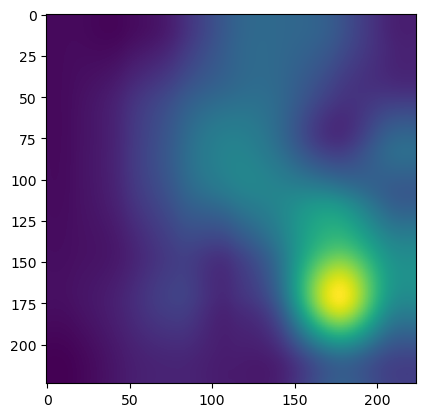

In [9]:
orig = F.interpolate(torch.tensor(orig_expl).unsqueeze(0), (224, 224), mode='bicubic')
plt.imshow(orig.squeeze())

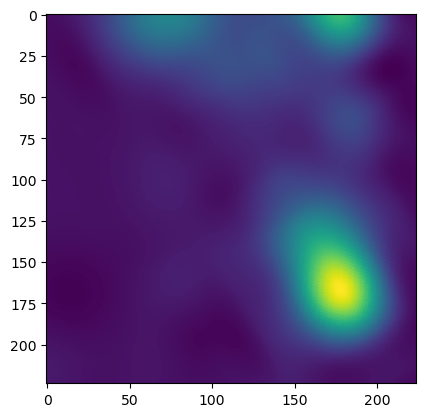

In [10]:
plt.imshow(true.squeeze())

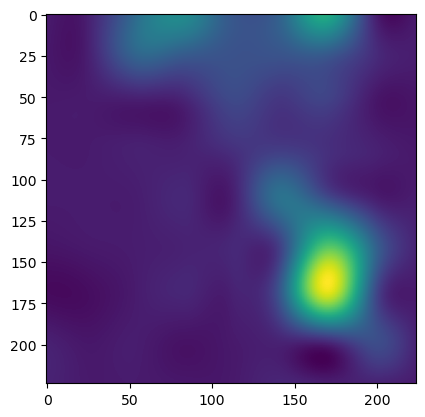

In [11]:
plt.imshow(test.squeeze())